# `AA Workshop 8` — Coding Challenge

Complete the tasks below to practice implementing classification modeling from `W8_Classification_Advanced.ipynb`.

Guidelines:
- Work in order. Run each cell after editing with Shift+Enter.
- Keep answers short; focus on making things work.
- If a step fails, read the error and fix it.

By the end you will have exercised:
- implementing classification models, including logistic regression, Naive Bayes, and SVMs
- evaluating and selecting the preferred model

## Task 1 - Predicting Penguin Species

Let's apply our classification skills in a multi-class setting. The Palmer penguins dataset contains information on three penguin species in the islands of the Palmer Archipelago, Antarctica. More information is available [here](https://archive.ics.uci.edu/dataset/690/palmer+penguins-3). When working on this task, keep in mind that this dataset is quite small (n=333 excluding observations missing data). You can load the data via seaborn using `sns.load_dataset("penguins").dropna()`. Train classifiers for the penguin species based on the two features `bill_length_mm` and `flipper_length_mm`. Specifically, evaluate the performance of a logistic regression, Gaussian Naive Bayes, and SVM classifier with linear kernel, polynomial kernel (3 degrees), and RBF kernel. Report the performance of your selected model.

In [1]:
# your code here
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.svm import LinearSVC # Linear Support Vector Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
df = sns.load_dataset("penguins").dropna()





In [2]:
def score_model(model, norm=None, test = False):
    if norm is not None:
        X_train_norm = norm.fit_transform(X_train[:,0:2])
        X_val_norm = norm.fit_transform(X_val[:,0:2])
        X_test_norm = norm.fit_transform(X_test[:,0:2])
    else:
        X_train_norm = X_train[:,0:2]
        X_val_norm = X_val[:,0:2]
        X_test_norm = X_test[:,0:2]
    
    print(f'Training accuracy: {accuracy_score(y_train, model.predict(X_train_norm))}')
    print(f'Validation accuracy: {accuracy_score(y_val, model.predict(X_val_norm))}')
    print(f'Test accuracy: {accuracy_score(y_test, model.predict(X_test_norm))}') if test else None

In [3]:
def aio_helper(x1, x2, model, norm=None, test=False):
    if norm is not None:
        X_norm = norm.fit_transform(X_train[:,0:2])
    else:
        X_norm = X_train[:,0:2]
    
    model.fit(X_norm, y_train)
    
    # look how we did:
    score_model(model, norm=norm, test = test)

    x_range = [df[x1].min()-(df[x1].mean()*0.1), df[x1].max()+(df[x1].mean()*0.1)]
    y_range = [df[x2].min()-(df[x2].mean()*0.1), df[x2].max()+(df[x2].mean()*0.1)]

    # set up plotting
    fig, ax = plt.subplots(1,3 if test else 2, figsize=(13,5))
    
    # plot classification regions
    grid=1000
    xx,yy = np.meshgrid(np.linspace(x_range[0], x_range[1], grid),
                        np.linspace(y_range[0], y_range[1], grid))
    X_ = np.array([np.ravel(xx), np.ravel(yy)]).T
    if not norm is None:
        zz = model.predict(norm.transform(X_)).reshape(grid,grid)
    else:
        zz = model.predict(X_).reshape(xx.shape)

    # Convert species labels to numeric for plotting
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    le.fit(df['species'])
    zz_numeric = le.transform(zz.ravel()).reshape(grid, grid)

    for i in range(3 if test else 2):
        ax[i].imshow(
            zz_numeric,
            interpolation="nearest",
            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            aspect="auto",
            alpha=0.5,
            origin="lower",
            cmap='viridis',
        )

    # plot data points - fixed unpacking
    for idx in range(3 if test else 2):
        if idx == 0:
            X_plot_x, X_plot_y, y_plot = X_train[:,0], X_train[:,1], y_train
            title = 'Training Data'
        elif idx == 1:
            X_plot_x, X_plot_y, y_plot = X_val[:,0], X_val[:,1], y_val
            title = 'Validation Data'
        else:
            X_plot_x, X_plot_y, y_plot = X_test[:,0], X_test[:,1], y_test
            title = 'Test Data'
        
        sns.scatterplot(ax=ax[idx], x=X_plot_x, y=X_plot_y, hue=y_plot, 
                       palette='viridis', s=100)
        ax[idx].set_title(title)
        ax[idx].set_xlabel(features[0])
        ax[idx].set_ylabel(features[1])

    plt.tight_layout()
    plt.show()

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Training accuracy: 0.8040201005025126
Validation accuracy: 0.7761194029850746


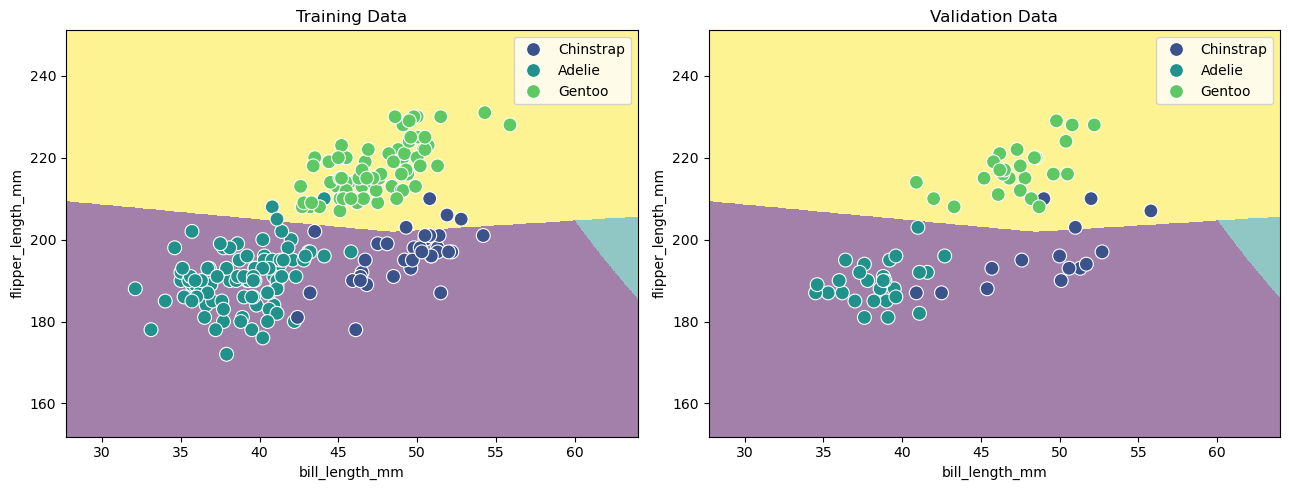

In [5]:
from sklearn.svm import SVC

features = ('bill_length_mm','flipper_length_mm')

# Read in the data set and choose features to use

X = np.array(df[[*features]])
Y = df['species'].values

# split the data set for cross-validation
X_train, X_, y_train, y_ = train_test_split(X, Y, train_size = 0.6)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size = 0.5)

# fit a model with RBF features (kernel)
model = SVC(kernel='rbf')

# do a first run without scaling and hyperparameter tuning
aio_helper(*features[:2], model, norm=None, test=False)

Training accuracy: 0.9698492462311558
Validation accuracy: 0.8955223880597015


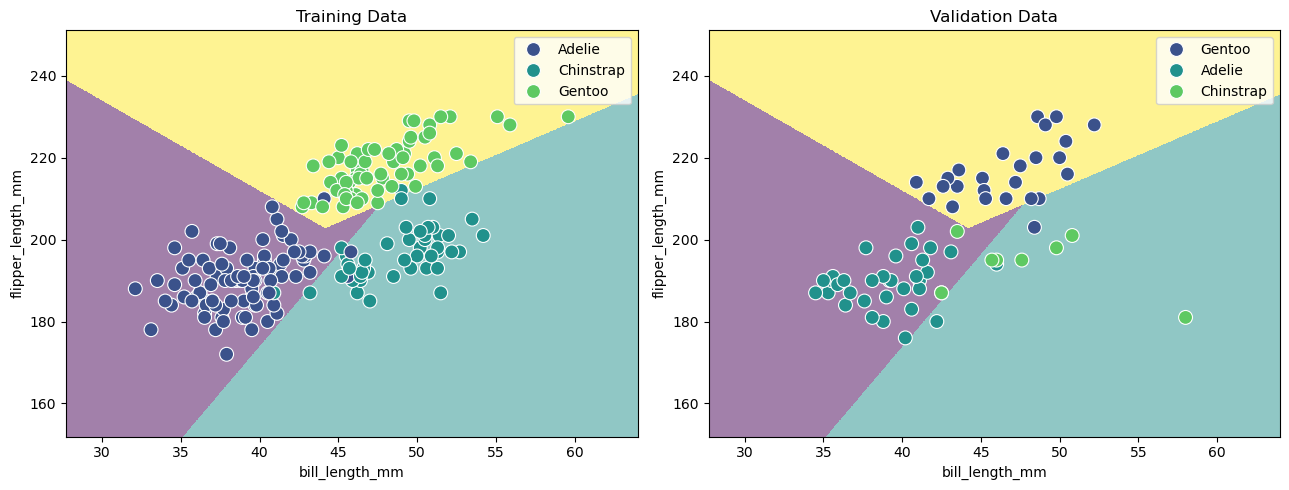

In [6]:
# Evaluate with linear kernel
features = ('bill_length_mm','flipper_length_mm')

# Read in the data set and choose features to use

X = np.array(df[[*features]])
Y = df['species'].values

# split the data set for cross-validation
X_train, X_, y_train, y_ = train_test_split(X, Y, train_size = 0.6)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size = 0.5)

# fit a model with RBF features (kernel)
model = SVC(kernel='linear', C=100)

# do a first run without scaling and hyperparameter tuning
aio_helper(*features[:2], model, norm=None, test=False)

---